In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [157]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [158]:
df_nodate = df.drop(['date', 'sqft_basement', 'zipcode'], axis=1)
df_nodate.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,0.0,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,NaN,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,47.6168,-122.045,1800,7503


In [159]:
df_2 = df.loc[:,['price','bedrooms','bathrooms','floors','view','zipcode', 'condition','sqft_living','grade']]
df_2.head()

,price,bedrooms,bathrooms,floors,view,zipcode,condition,sqft_living,grade
0,221900.0,3,1.00,1.0,0.0,98178,3,1180,7
1,538000.0,3,2.25,2.0,0.0,98125,3,2570,7
2,180000.0,2,1.00,1.0,0.0,98028,3,770,6
3,604000.0,4,3.00,1.0,0.0,98136,5,1960,7
4,510000.0,3,2.00,1.0,0.0,98074,3,1680,8


In [160]:
df_3 = df.loc[:,['yr_renovated']]
df_3
df_3.dropna()

,yr_renovated
0,0.0
1,1991.0
3,0.0
4,0.0
5,0.0
...,...
21592,0.0
21593,0.0
21594,0.0
21595,0.0


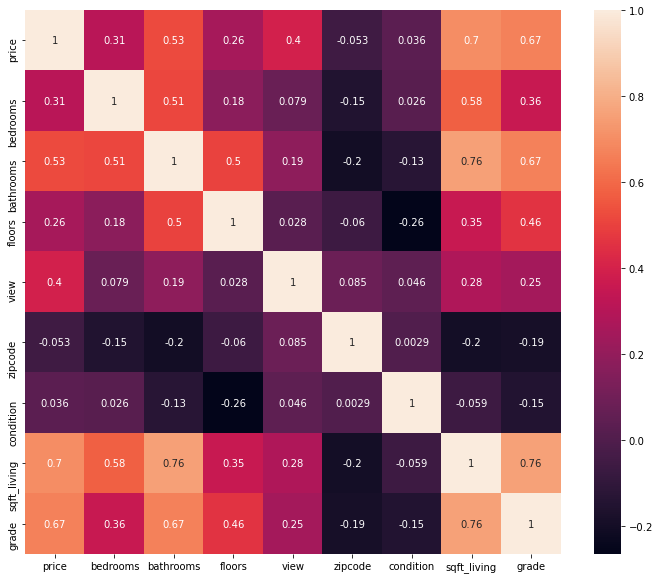

In [161]:
plt.subplots(figsize=(12,10))
ax = sns.heatmap(df_2.corr(), annot=True);

<AxesSubplot:title={'center':'House Data'}>

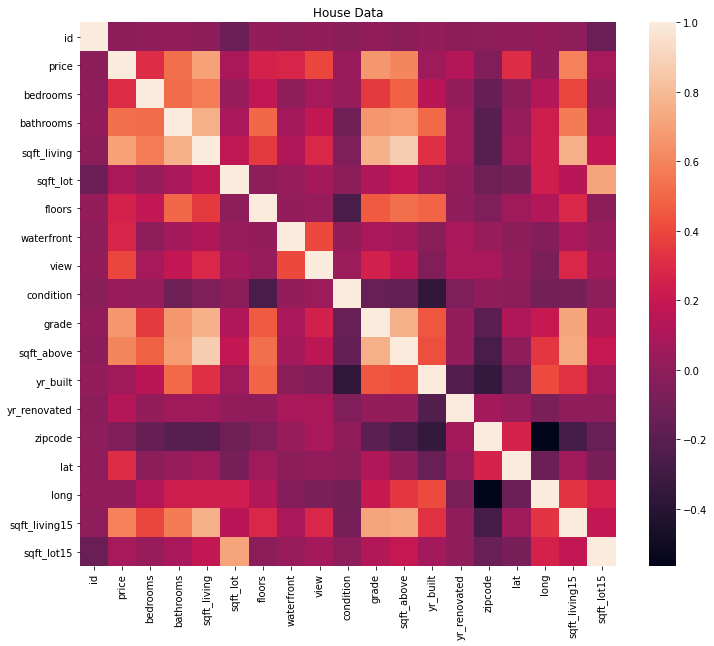

In [162]:
plt.subplots(figsize=(12,10))
ax = plt.axes()
ax.set_title("House Data")
corr= df.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

In [163]:
results = smf.ols("bedrooms ~price", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:24:50   Log-Likelihood:                -27909.
No. Observations:               21597   AIC:                         5.582e+04
Df Residuals:                   21595   BIC:                         5.584e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9525      0.011    276.905      0.0

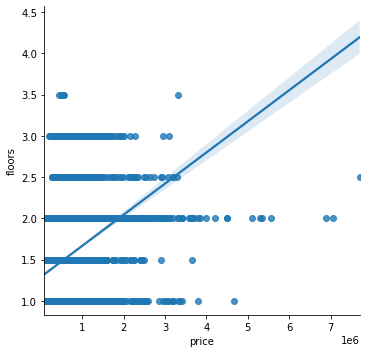

In [164]:
sns.lmplot(x="price", y="floors", data=df)

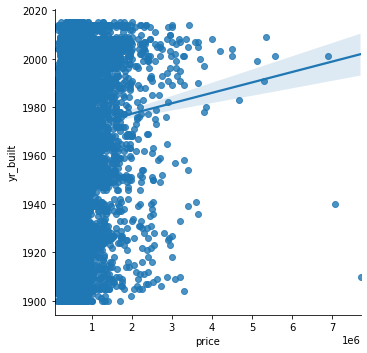

In [165]:
sns.lmplot(x="price", y="yr_built", data=df)

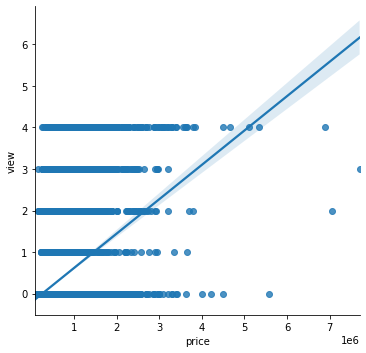

In [166]:
sns.lmplot(x="price", y="view", data=df)

In [167]:
results = smf.ols("price ~bathrooms", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:24:53   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8712.6518   6224.769      1.400      0.1

In [168]:
df[df.bedrooms ==33]
df.bedrooms[15856] = 3

<ipython-input-168-adbe57747b52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bedrooms[15856] = 3


<AxesSubplot:xlabel='view', ylabel='price'>

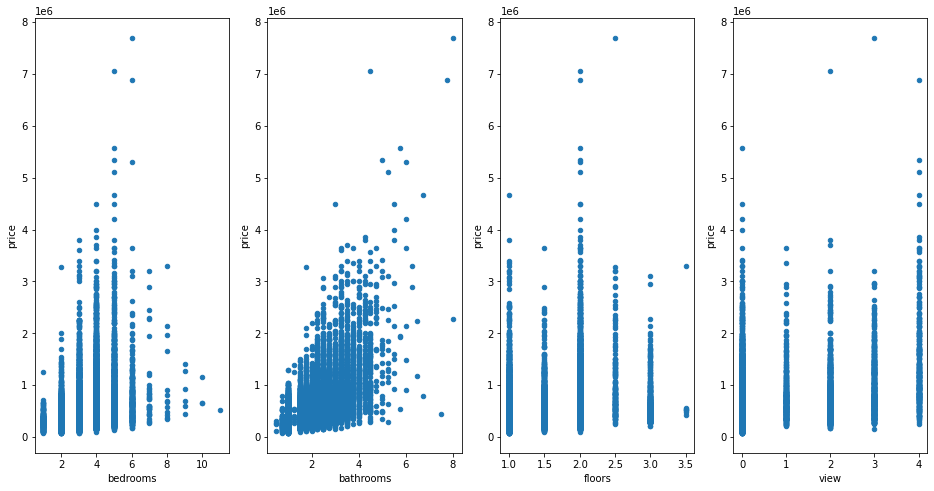

In [169]:
fig, axs = plt.subplots(1, 4,)
df.plot(kind='scatter', x='bedrooms', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='bathrooms', y='price', ax=axs[1])
df.plot(kind='scatter', x='floors', y='price', ax=axs[2])
df.plot(kind='scatter', x = 'view', y = 'price', ax=axs[3])

<AxesSubplot:xlabel='id', ylabel='price'>

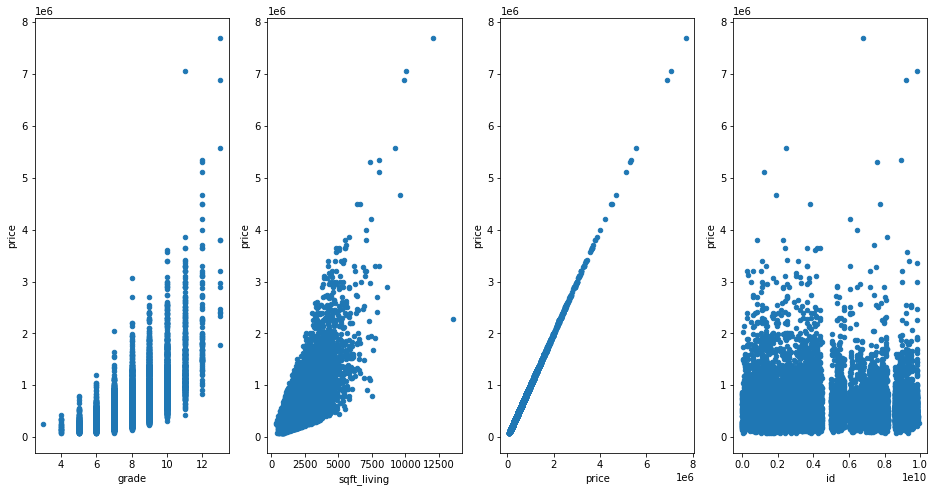

In [170]:
fig, axs = plt.subplots(1, 4,)
df.plot(kind='scatter', x='grade', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='sqft_living', y='price', ax=axs[1])
df.plot(kind='scatter', x='price', y='price', ax=axs[2])
df.plot(kind='scatter', x = 'id', y = 'price', ax=axs[3])

In [171]:
house_feats = df[['bedrooms', 'bathrooms', 'floors']]
house_target = df['price']
lr = LinearRegression()
lr.fit(house_feats, house_target)
lr.score(house_feats, house_target)

0.27862831348773875

In [172]:
X = df[['floors','bedrooms','bathrooms']]
Y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
X_train.isna().sum()
X_test.isna().sum()
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Intercept: {}'.format(lr.intercept_))
print('Slope: {}'.format(lr.coef_))
train_preds1 = lr.predict(X_train)
test_preds1 = lr.predict(X_test)
print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds1))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds1))))

Intercept: [-36268.38643994]
Slope: [[ -3704.43137876  22123.53786374 240256.18555987]]
Training RMSE: 310190.1457315152
Testing RMSE: 317428.1205384854


In [173]:
house_feats = df[['grade','bedrooms','bathrooms', 'sqft_living']]
house_target = df['price']
lr = LinearRegression()
lr.fit(house_feats, house_target)
lr.score(house_feats, house_target)

0.544343304494551

In [174]:
X = df[['grade','bedrooms','bathrooms', 'sqft_living', 'yr_built', 'sqft_lot', 'sqft_above','condition']]
Y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
X_train.isna().sum()
X_test.isna().sum()
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Intercept: {}'.format(lr.intercept_))
print('Slope: {}'.format(lr.coef_))
train_preds1 = lr.predict(X_train)
test_preds1 = lr.predict(X_test)
print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds1))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds1))))

Intercept: [6812336.51193829]
Slope: [[ 1.38007932e+05 -5.10508995e+04  5.97017009e+04  1.91220717e+02
  -3.91489469e+03 -3.00864212e-01 -1.39827034e+01  1.91320978e+04]]
Training RMSE: 225118.2318431218
Testing RMSE: 232592.85205082275


In [175]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:>

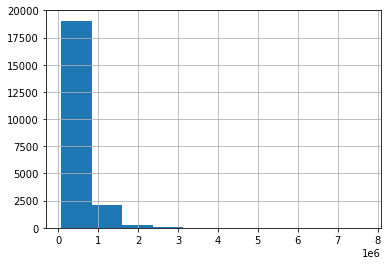

In [176]:
df['price'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fab22590c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab22582310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab225908b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab225829d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab22582d30>],
 'means': []}

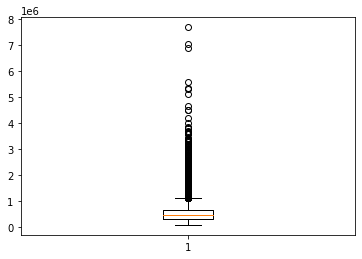

In [177]:
plt.boxplot(df['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fab25d120d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab25d12790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab25d0dd30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab25d12e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab25cf31f0>],
 'means': []}

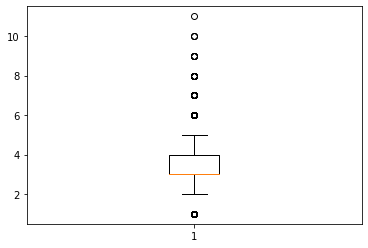

In [178]:
plt.boxplot(df['bedrooms'])

In [179]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['price']))
print(z)

[0.86671627 0.00625157 0.98077344 ... 0.37618606 0.38190525 0.58606486]


In [180]:
threshold = 3
print(np.where(z > 3))

(array([   21,   153,   246,   269,   282,   300,   312,   518,   540,
         556,   656,   779,   814,  1030,  1150,  1159,  1162,  1215,
        1270,  1280,  1313,  1359,  1418,  1431,  1446,  1674,  1728,
        1730,  1768,  1942,  1943,  2038,  2083,  2134,  2138,  2177,
        2198,  2234,  2265,  2318,  2442,  2459,  2471,  2563,  2624,
        2856,  2862,  2897,  2972,  3018,  3033,  3037,  3089,  3154,
        3226,  3255,  3278,  3335,  3341,  3381,  3515,  3731,  3744,
        3757,  3765,  3773,  3809,  3857,  3867,  3910,  4009,  4028,
        4031,  4145,  4186,  4214,  4264,  4335,  4402,  4404,  4407,
        4424,  4482,  4631,  4758,  4807,  4855,  4917,  4918,  5428,
        5444,  5446,  5584,  5595,  5612,  5697,  5744,  5822,  5824,
        5858,  5874,  5961,  6035,  6039,  6189,  6191,  6227,  6329,
        6396,  6493,  6495,  6502,  6685,  6708,  6734,  6765,  6777,
        6788,  6995,  7028,  7070,  7120,  7184,  7245,  7304,  7306,
        7380,  7408

In [181]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id               5.185851e+09
price            3.230000e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.120000e+03
sqft_lot         5.645000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
yr_built         4.600000e+01
yr_renovated     0.000000e+00
zipcode          8.500000e+01
lat              2.069000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
dtype: float64


In [182]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(15095, 21)

In [183]:
X = df[['grade','bedrooms','bathrooms', 'sqft_living', 'yr_built', 'sqft_lot', 'sqft_above','condition']]
Y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
X_train.isna().sum()
X_test.isna().sum()
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Intercept: {}'.format(lr.intercept_))
print('Slope: {}'.format(lr.coef_))
train_preds1 = lr.predict(X_train)
test_preds1 = lr.predict(X_test)
print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds1))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds1))))

Intercept: [6812336.51193829]
Slope: [[ 1.38007932e+05 -5.10508995e+04  5.97017009e+04  1.91220717e+02
  -3.91489469e+03 -3.00864212e-01 -1.39827034e+01  1.91320978e+04]]
Training RMSE: 225118.2318431218
Testing RMSE: 232592.85205082275


In [188]:
df_price = df.iloc 
df_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [204]:
df_price = df.loc[:,['price']]
df_price.tail(20)

,price
21577,1090000.0
21578,350000.0
21579,520000.0
21580,679950.0
21581,1580000.0
21582,541800.0
21583,810000.0
21584,1540000.0
21585,467000.0
21586,224000.0


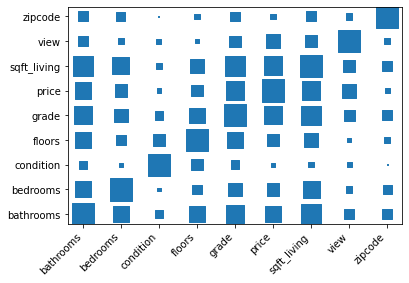

In [210]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = pd.read_csv('../../../data/kc_house_data.csv')
columns = ['price','bedrooms','bathrooms','floors','view','zipcode', 'condition','sqft_living','grade'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)


NameError: name 'x_to_num' is not defined